In [1]:
import tsunamibayes as tb
import numpy as np

# Testing Haversine (Distance Between Points on Globe)

In [2]:
R = 6.3781e6    #Radius of the earth
lat1 = np.array([50.06638889])    #Just two random lat/lon coordinates for testings purposes
lon1 = np.array([5.71472222])
lat2 = np.array([58.64388889])
lon2 = np.array([3.070000])
distance = tb.utils.haversine(lat1,lon1,lat2,lon2)
distance/10000      #This is the correct distance according to some other distance calculators found on Google.

array([ 96.9933261])

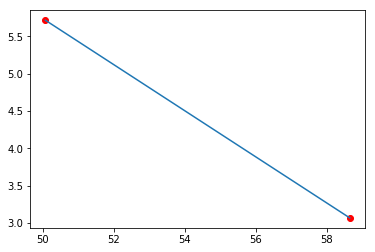

In [3]:
import matplotlib.pyplot as plt
pointsx = [lat1, lat2]
pointsy = [lon1, lon2]
plt.plot(pointsx, pointsy, 'ro')
plt.plot(pointsx,pointsy)
plt.show()

# Creat a Reference Curve Fault Object

In [4]:
import pandas as pd     #Pandas is the library that contains some useful objects/functions for storing and organizing data.

df = pd.read_excel ('Flores.xlsx')     #df stands for data frame for the Flores fault.
dfwalinae = pd.read_excel('Walinae.xlsx')    #the data frame containing the coordinates for the Walinae fault. 
print(dfwalinae)
print (df)

     OBJECTID  Shape_Length     START_X   START_Y       END_X     END_Y  \
0           1      0.008964  120.519996 -6.794426  120.523974 -6.786393   
1           2      0.008964  120.523974 -6.786393  120.527912 -6.778340   
2           3      0.008964  120.527912 -6.778340  120.531808 -6.770267   
3           4      0.008964  120.531808 -6.770267  120.535664 -6.762174   
4           5      0.008964  120.535664 -6.762174  120.539478 -6.754062   
5           6      0.008964  120.539478 -6.754062  120.543249 -6.745929   
6           7      0.008964  120.543249 -6.745929  120.546979 -6.737778   
7           8      0.008964  120.546979 -6.737778  120.550666 -6.729607   
8           9      0.008964  120.550666 -6.729607  120.554309 -6.721417   
9          10      0.008964  120.554309 -6.721417  120.557910 -6.713207   
10         11      0.008964  120.557910 -6.713207  120.561466 -6.704979   
11         12      0.008964  120.561466 -6.704979  120.564979 -6.696732   
12         13      0.0089

In [5]:
latFlores = df.iloc[:,8]    #We slice here the important information: lat/lon/strike coordinates. We don't really use the other columns according to my knowledge
lonFlores = df.iloc[:,7]    
strikeFlores = df.iloc[:,9]
latWali = dfwalinae.iloc[:,8]
lonWali = dfwalinae.iloc[:,7]
strikeWali = dfwalinae.iloc[:,9]

#From what I understand, these slices are not numpy Arrays, they still contain the column title/index.


In [6]:
latFlores = latFlores.values   #We slice here the important information: lat/lon/strike coordinates. We don't really use the other columns according to my knowledge
lonFlores = lonFlores.values    
strikeFlores = strikeFlores.values
latWali = latWali.values
lonWali = lonWali.values
strikeWali = strikeWali.values

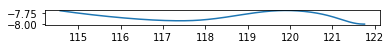

In [7]:
plt.plot(lonFlores, latFlores)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()
#Flores fault lat/lon. 

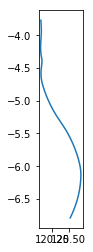

In [8]:
plt.plot(lonWali, latWali)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()
#Walinae fault lat/lon...
#This one will be a little weirder to make sure we don't have weird discontinuties when we interpolate the strike angle.

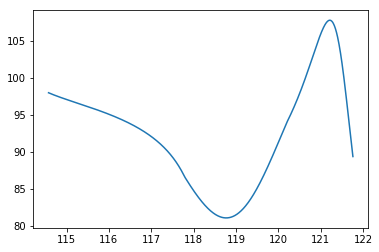

In [9]:
plt.plot(lonFlores, strikeFlores)
plt.show()

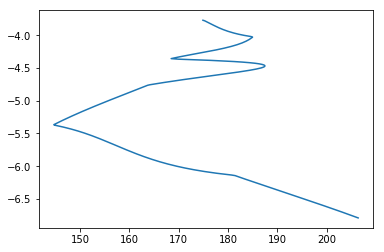

In [10]:
plt.plot(strikeWali, latWali)
plt.show()

In [11]:
#Creating the bounds for Flores fault object.
minlatF = latFlores.min()
maxlatF = latFlores.max()
minlonF = lonFlores.min()
maxlonF = lonFlores.max()

minlatW = latWali.min()
maxlatW = latWali.max()
minlonW = lonWali.min()
maxlonW = lonWali.max()


In [12]:
boundsFlores = {'lon_min' : minlonF,'lon_max' : maxlonF,
            'lat_min' : minlatF, 'lat_max':maxlatF}
boundsWali = {'lon_min' : minlonW,'lon_max' : maxlonW,
            'lat_min' : minlatW, 'lat_max':maxlatW}

In [13]:
#Using some test dip/depth curves. Essentially we assume that the dip/depth are constant throughout. 

depthcurve = lambda depth : 25*1000
dipcurve = lambda dip : 25

In [14]:
floresFault = tb.fault.ReferenceCurveFault(latFlores,lonFlores,strikeFlores,depthcurve,dipcurve,boundsFlores)
walinaeFault = tb.fault.ReferenceCurveFault(latWali, lonWali, strikeWali, depthcurve, dipcurve, boundsWali)
#Hey, it works! 

In [15]:
walinaeFault

# Test the Quad_Interp Function
This is most likely obsolete

In [16]:
x = np.array([1,2,3])
y = np.array([100,-3,25])

In [17]:
tb.fault.ReferenceCurveFault.quad_interp(x,y)

array([  65.5, -299.5,  334. ])

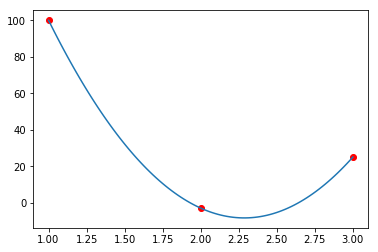

In [18]:
#Make sure to always use numPy arrays here!!!

x = np.array([1,2,3])
y = np.array([100,-3,25])
cof= tb.fault.ReferenceCurveFault.quad_interp(x,y)

graphx = np.linspace(1,3,100)
graphx = np.array(graphx)
graphy = cof[0]*graphx**2 + cof[1]*graphx + cof[2]
plt.plot(x,y,'ro')
plt.plot(graphx, graphy)
plt.show()

# Testing the Creation of Depth/Dip Curves

In [19]:
#Some debugging to do here...

xtest = np.array([-5,10,15])
ytest = np.array([20,25,30])
depthcurve, dipcurve = tb.fault.ReferenceCurveFault.depth_dip_curves(xtest,ytest,20)

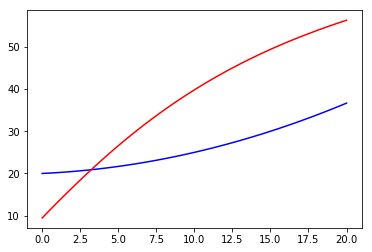

In [20]:
xplot = np.linspace(0,20,100)
yplotdepth = depthcurve(xplot)
yplotdip = dipcurve(xplot)
plt.plot(xplot,yplotdepth,'b')
plt.plot(xplot,yplotdip,'r')
plt.show()

# Test Circ Mean (weighted mean of various angles)

In [21]:
#I simply gave each point a weight of 1 here.
weights = np.array([1,1,1])
strikeAngles = np.array([96, 90, 87])
tb.fault.ReferenceCurveFault.circmean(strikeAngles,weights)

90.998982982317415

# Testing the Side Method

### This function seems to handle arrays just fine!

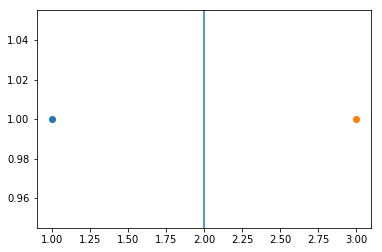

In [22]:
plt.axvline(x=2)
plt.plot(1,1,'o')
plt.plot(3,1,'o')
plt.show()

In [23]:
tb.fault.ReferenceCurveFault.side(1,1,2,1,90)

1

In [24]:
tb.fault.ReferenceCurveFault.side(3,1,2,1,90)

-1

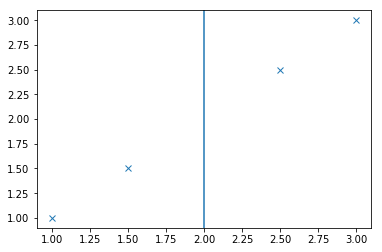

In [25]:
closeLat = 2    #This is just a made up "closest point" to test whether we can pass in an array of points. 
closeLon =2 
latPoints = np.array([1, 1.5, 2.5, 3])
lonPoints = np.array([1,1.5,2.5,3])
plt.axvline(x=2)
plt.plot(latPoints, lonPoints, 'x')
plt.show()

In [26]:
tb.fault.ReferenceCurveFault.side(latPoints,lonPoints,closeLat, closeLon, 180)

array([ 1.,  1., -1., -1.])

In [47]:
testlat = np.array([-7.7])
testlon = np.array([115])

testlatArray = np.array([-7.7, -7.7])
testlonArray = np.array([115,118])
testlatArray[:, np.newaxis]

array([[-7.7],
       [-7.7]])

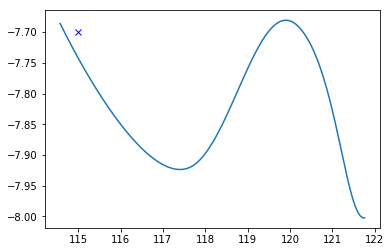

In [48]:
plt.plot(lonFlores, latFlores)
plt.plot(testlon, testlat, 'bx')
plt.show()

# Testing Distances Function

In [49]:
#This works well for one point, but we still need to figure out how the arrays will broadcast. 
testlatArray[:,np.newaxis]

array([[-7.7],
       [-7.7]])

In [50]:
[minDist, idxMin] = floresFault.distance(testlatArray[:,np.newaxis], testlonArray[:,np.newaxis], retclose= True)

In [51]:
tb.utils.haversine(testlatArray[:,np.newaxis], testlonArray[:,np.newaxis], floresFault.latpts[np.newaxis,:],floresFault.lonpts[np.newaxis,:])

array([[  46970.8837929 ,   45987.09700713,   45003.52914852, ...,
         744196.96274397,  745182.42370356,  746167.58130996],
       [ 377898.01866617,  376917.16386443,  375936.3106072 , ...,
         413987.89573173,  414971.16804869,  415953.8462164 ]])

In [ ]:
# We need to find a way to use the min() function on each entry of the array. 

In [52]:
minDist, idxMin = floresFault.distance(testlat, testlon, retclose= True)

In [53]:
[minDist, idxMin]

[4689.0043934908954, 47]

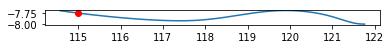

In [54]:
plt.plot(lonFlores, latFlores)
plt.plot(testlon, testlat, 'bx')
plt.plot(lonFlores[idxMin], latFlores[idxMin], 'ro')
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

In [55]:
floresFault.side(testlat, testlon, latFlores[idxMin], lonFlores[idxMin], strikeFlores[idxMin])

array([-1.])

# Testing of Dip, Strike, and Depth Curves

In [56]:
floresFault.strike_map(testlat, testlon)

96.674176771131243

In [57]:
floresFault.strike_map(testlatArray[:,np.newaxis], testlonArray[:,np.newaxis])

array([ 96.67417677,  85.69570056])

In [58]:
floresFault.depth_map(testlat, testlon, retside = True)

(25000, array([-1.]))

In [59]:
floresFault.depth_map(testlatArray[:,np.newaxis], testlonArray[:,np.newaxis], retside = True)
#Intersting...why does this only return a single depth value...

(25000, array([[-1.],
        [-1.]]))

In [61]:
floresFault.dip_map(testlat, testlon)

25

In [62]:
floresFault.dip_map(testlatArray[:,np.newaxis], testlonArray[:,np.newaxis])

25

# Testing for Broadcasting/np.newaxis

In [41]:
lat1 = np.array([0,1])
lon1 = np.array([10,20])

faultlats = np.array([0,1,2,3,4,5,6,7,8,9])
faultlons = np.array([0,10,20,30,40,50,60,70,80,90])


In [42]:
faultlats[np.newaxis, :]-lat1[:,np.newaxis]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [-1,  0,  1,  2,  3,  4,  5,  6,  7,  8]])

In [43]:
lon1[:,np.newaxis]-faultlons[np.newaxis, :]

array([[ 10,   0, -10, -20, -30, -40, -50, -60, -70, -80],
       [ 20,  10,   0, -10, -20, -30, -40, -50, -60, -70]])

In [44]:
tb.utils.haversine(lat1[:,np.newaxis],lon1[:,np.newaxis], faultlats[np.newaxis, :],faultlons[np.newaxis, :])

array([[ 1113188.4502145 ,   111318.84502145,  1135011.76048711,
         2250269.6045022 ,  3366378.22020507,  4481600.72591566,
         5595204.08607751,  6706544.80552436,  7814896.73454744,
         8919351.03881787],
       [ 2229044.31025006,  1113018.4746219 ,   111318.84502145,
         1134511.66944759,  2248914.00524947,  3363796.56087622,
         4477386.80492594,  5588899.91382447,  6697619.09446213,
         7802715.28486973]])